<span style="font-size:9pt">Copyright Jean-Luc CHARLES (Jean-Luc.charles@ensam.eu) 2022 CC BY-SA 4.0</span>

# Machine learning avec les modules Python tensorflow2/keras :

# Entraînement / exploitation d'un réseau de neurones dense pour la reconnaissance de chiffres manuscrits

version 3.0 du 10 octobre 2022

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
    Il est fondamental d'utiliser un <span style="font-weight:bold;">Environnement Virtuel Python</span> (EVP) pour chaque projet Python important : l'EVP permet de maîtriser pour chaque projet les versions de l'interpréteur Python et des modules "sensibles" (comme tensorflow par exemple).</span></div>

Les <i>notebooks</i> de l'APP-ML doivent être chargés dans un processus `jupyter notebook` lancé dans l'EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b> créé en suivant la procédure du document `Consignes.pdf`. Ils doivent être travaillés dans l'ordre :

- `ML1_MNIST.ipynb` : vérifier le bon fonctionnement de l’EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b>, charger et utiliser les données de la banque MNIST (images et labels).
- `ML2_DNN.ipynb` : construire un réseau dense, l’entraîner avec les données de la banque MNIST et afficher ses performances.
- `ML3_DNN_suite.ipynb` : charger un réseau dense entraîné et l’exploiter avec les données de test  MNIST.

## Objectifs d'apprentissages visés :
- Savoir lancer un notebook dans une Evironnement Virtuel Python dédié
- Savoir charger les données de la banque MNIST (images et labels)
- Savoir visualiser des images du MNIST et vérifier le label associé.

## 1 - Vérifier l'importation des modules Python
Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans le module **tensorflow** (tf) depuis la version 2. <br>
La documentation du module **tf.keras** à consulter pour cet APP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

L'importation du module `tensorflow` dans la cellule ci-dessous peut générer quelques messages de warnings...<br>
si des erreurs apparaissent il faut les corriger, éventuellement en recréant ton EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b> :

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import matplotlib.pyplot as plt
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")

2022-11-03 15:58:31.230053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 15:58:31.230084: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Python    : 3.8.13
tensorflow: 2.8.0 incluant keras 2.8.0
numpy     : 1.21.2


## 2 - Charger les données de la banque MNIST (images et labels)

### La banque d'images MNIST

Dans ce TP nous utilisons les images labelisées de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST contient 70000 images en ton de gris de 28 $\times$ 28 pixels, représentant des chiffres manuscrits  : chaque image  correspond à une matrice 28$\times$28 de 784 nombres `uint8` (entiers positifs sur 8 bits, codant une valeur dans l'intervalle [0, 255]).<br>
Les 70000 images du MNIST sont regoupées en un jeu de **60000 images d'apprentissage** et un jeu de **10000 images de test**.

<div class="alert alert-block alert-danger">
L'évaluation des performances d'un réseau entraîné doit toujours se faire avec un jeu de données différent du jeu d'entraînement : c'est pour cela que la banque MNIST propose 10000 images de test <b>différentes</b> des 60000 images d'entraînement.
</div>
<br>Allure des images MNIST :
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="img/MNIST_digits_sample.png" width="500"><br>
[crédit image : JLC]
</p>

Consulter la documentation de la fonction `load_data` sur la page [tf.keras.datasets.mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) puis compléter la cellule ci-dessous pour charger les données du MNIST en nommant les données renvoyées :<br>
- `im_train`, `lab_train` : les images et les labels d'entraînement,
- `im_test`, `lab_test` : les images et les labels de test.

(En cas de message d'erreur de type _"SSL error...."_ pour téléchager les données du MNIST, voir [Python SSL Certification Problems in Tensorflow](https://stackoverflow.com/questions/46858630/python-ssl-certification-problems-in-tensorflow))

In [2]:
(im_train, lab_train), (im_test, lab_test) = keras.datasets.mnist.load_data()

La cellule ci-dessous affiche les attributs `shape` et `dtype` des tableaux numpy obtenus : les valeurs sont-elles cohérentes ? pourquoi ?

In [3]:
print("im_train.shape :", im_train.shape, ", dtype:", im_train.dtype,)
print("lab_train.shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("im_test.shape  :", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_test.shape :", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train.shape : (60000, 28, 28) , dtype: uint8
lab_train.shape: (60000,) , dtype: uint8
im_test.shape  : (10000, 28, 28) , dtype: uint8
lab_test.shape : (10000,) , dtype: uint8


#### Visualisation des images et des étiquettes :

Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 600-ème image du tableau `im_train`.<br>
Indications :
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image,
- utiliser l'option `cmap='gray'` de la fonction`imshow` pour l'affichage en ton de gris,
- enlever les graduations en X et Y (par exemple avec `plt.xticks([]); plt.yticks([])`).

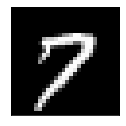

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[599], cmap='gray')
plt.xticks([]); plt.yticks([]);

Vérifier que le label associé  dans la tableau `im_train` correspond bien à ce qu'on voit sur l'image....

In [5]:
lab_train[599]

7

La fonction `plot_images` définie ci-dessous prends les arguments `(images, r, L, C)` : elle affiche les images du tableau `images` (tableau de matrices) dans une grille d'images de `L` lignes et `C` colonnes  en commençant avec l'image de rang `r`.

In [6]:
def plot_images(images, r,L,C):
    plt.figure(figsize=(C,L))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(images[r+i], cmap='gray')
        plt.xticks([]); plt.yticks([])

En utilisant la fonction `plot_images` faire afficher les images d'entraînement dans une grille de 4 x 6 à partir de la 600 ème image :

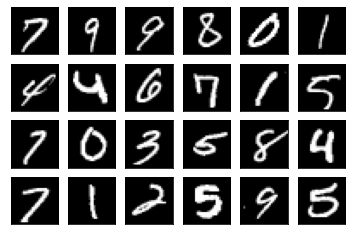

In [7]:
plot_images(im_train, 599, 4, 6)

Dans la cellule ci-dessous, on trie les images et on affiche des lignes de '0', des lignes de '1'... en noir sur fond blanc :

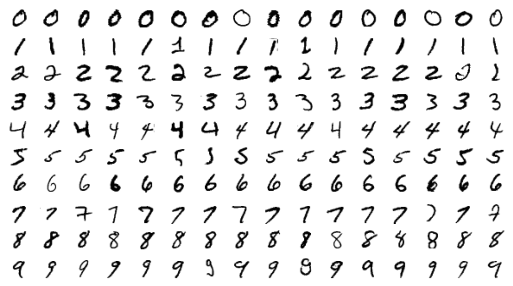

In [8]:
data = []
for i in range(10):
    indexes = np.where(lab_train == i) # tableau des indices des labels égaux à i
    i_data = im_train[indexes][:16]    # tableau des 16 images correspondant
    data.append(i_data)

plt.figure(figsize=(9,5))
L, C = len(data), len(data[0])
for row, digits in enumerate(data):
    for col, digit in enumerate(digits):
        plt.subplot(L, C , row*C + col + 1)
        plt.imshow(255-digit, cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.box(False)

### Suite : 
Tu peux maintenant charger le *notebook* `ML2_DNN.ipynb` pour apprendre à construire un réseau de neurones dense et l'entraîner à classifier les images MNIST.